# Modelado

In [147]:
import joblib
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Cargar los datos procesados
# Nota: No necesitamos el DataFrame original aquí, solo los números para la red.
X_train_scaled = joblib.load('../data/processed/X_train_scaled.pkl')
X_test_scaled = joblib.load('../data/processed/X_test_scaled.pkl')
y_train = joblib.load('../data/processed/y_train.pkl')
y_test = joblib.load('../data/processed/y_test.pkl')

print(f"Datos cargados correctamente.")
print(f"Input Shape (Features): {X_train_scaled.shape}")

Datos cargados correctamente.
Input Shape (Features): (6042, 8)


In [148]:
import os
import random

# Definimos una semilla arbitraria (42 es la clásica en programación)
SEED_VALUE = 42

# 1. Semilla de Python (para funciones básicas)
os.environ['PYTHONHASHSEED'] = str(SEED_VALUE)
random.seed(SEED_VALUE)

# 2. Semilla de NumPy (para manipulación de arrays y splits)
np.random.seed(SEED_VALUE)

# 3. Semilla de TensorFlow (para inicialización de pesos de la red)
tf.random.set_seed(SEED_VALUE)

print(f"Semilla global fijada en: {SEED_VALUE}. Los resultados ahora serán reproducibles.")

Semilla global fijada en: 42. Los resultados ahora serán reproducibles.


In [149]:
# 2. Definir la Arquitectura del Modelo (MLP)
model = Sequential()

# Capa de Entrada + Oculta 1 (64 neuronas)
# input_dim: Se ajusta automáticamente al número de columnas de X_train
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.2)) # Apagamos el 20% para evitar memorización (Overfitting)

# Capa Oculta 2 (32 neuronas)
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Capa Oculta 3 (16 neuronas - Refinamiento)
model.add(Dense(16, activation='relu'))

# Capa de Salida (1 neurona)
# Activation 'linear' porque queremos predecir un valor numérico continuo (Regresión)
model.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=0.001)

# 3. Compilación
# Optimizer 'adam': El mejor estándar general.
# Loss 'mse': Mean Squared Error (Castiga errores grandes).
# Metrics 'mae': Mean Absolute Error (Más fácil de entender para humanos).
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)               │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [150]:
# Definir el "Freno de Mano"
early_stop = EarlyStopping(
    monitor='val_loss',       # Vigila el error en datos de validación
    patience=10,              # Si no mejora en 10 épocas...
    restore_best_weights=True # ...vuelve al mejor momento y detente.
)

# Entrenar
print("Iniciando entrenamiento...")
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,     # Usa un 20% del train para validarse a sí misma mientras aprende
    epochs=100,               # Intenta hasta 100 veces
    batch_size=64,            # Procesa de a 128 clientes a la vez
    callbacks=[early_stop],
    verbose=1
)

print("Entrenamiento finalizado.")

Iniciando entrenamiento...
Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 17.6122 - mae: 3.6380 - val_loss: 8.8814 - val_mae: 2.7632
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0980 - mae: 2.6083 - val_loss: 7.7209 - val_mae: 2.4315
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6796 - mae: 2.5145 - val_loss: 7.4962 - val_mae: 2.3523
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3593 - mae: 2.4450 - val_loss: 7.4270 - val_mae: 2.3569
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2203 - mae: 2.4229 - val_loss: 7.3708 - val_mae: 2.3422
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2239 - mae: 2.4199 - val_loss: 7.4296 - val_mae: 2.3883
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2321 - mae: 2.4190 - val_loss: 7.3816 - val_mae: 2.3599
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1059 - mae: 2.3934 - val_loss: 7.3142 - val_mae: 2.3226
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━

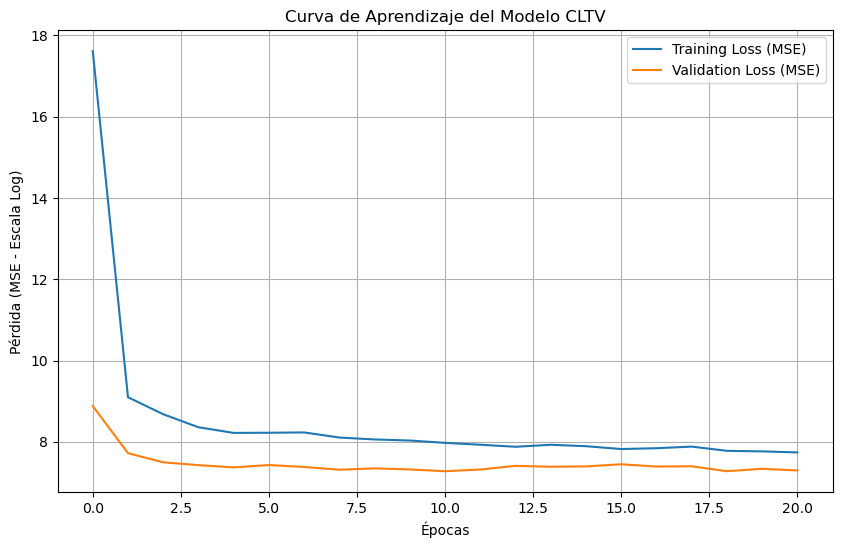

In [151]:
# Graficar la curva de pérdida (Loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Curva de Aprendizaje del Modelo CLTV')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE - Escala Log)')
plt.legend()
plt.grid(True)
plt.show()

In [152]:
# Crear carpeta de modelos
os.makedirs('../models', exist_ok=True)

# Guardar el modelo entrenado
model.save('../models/cltv_model_v1.keras')

print("Modelo guardado exitosamente en '../models/cltv_model_v1.keras'")
print("Listo para pasar al notebook de Evaluación.")

Modelo guardado exitosamente en '../models/cltv_model_v1.keras'
Listo para pasar al notebook de Evaluación.
